In [1]:
from sklearn.datasets import load_iris

In [2]:
iris=load_iris()

In [4]:
X=iris.data

In [5]:
y=iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [7]:
X_train.shape

(120, 4)

In [8]:
X_test.shape

(30, 4)

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
clf=DecisionTreeClassifier()

In [11]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [12]:
y_pred=clf.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9666666666666667

In [14]:
from sklearn.tree import plot_tree

In [15]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=80,50

[Text(0.5416666666666666, 0.9285714285714286, 'x[3] <= 0.8\ngini = 0.665\nsamples = 120\nvalue = [41, 43, 36]'),
 Text(0.4583333333333333, 0.7857142857142857, 'gini = 0.0\nsamples = 41\nvalue = [41, 0, 0]'),
 Text(0.5, 0.8571428571428572, 'True  '),
 Text(0.625, 0.7857142857142857, 'x[3] <= 1.75\ngini = 0.496\nsamples = 79\nvalue = [0, 43, 36]'),
 Text(0.5833333333333333, 0.8571428571428572, '  False'),
 Text(0.4166666666666667, 0.6428571428571429, 'x[2] <= 5.35\ngini = 0.159\nsamples = 46\nvalue = [0, 42, 4]'),
 Text(0.3333333333333333, 0.5, 'x[3] <= 1.65\ngini = 0.087\nsamples = 44\nvalue = [0, 42, 2]'),
 Text(0.16666666666666666, 0.35714285714285715, 'x[2] <= 4.95\ngini = 0.046\nsamples = 42\nvalue = [0, 41, 1]'),
 Text(0.08333333333333333, 0.21428571428571427, 'gini = 0.0\nsamples = 40\nvalue = [0, 40, 0]'),
 Text(0.25, 0.21428571428571427, 'x[2] <= 5.05\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.16666666666666666, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = 

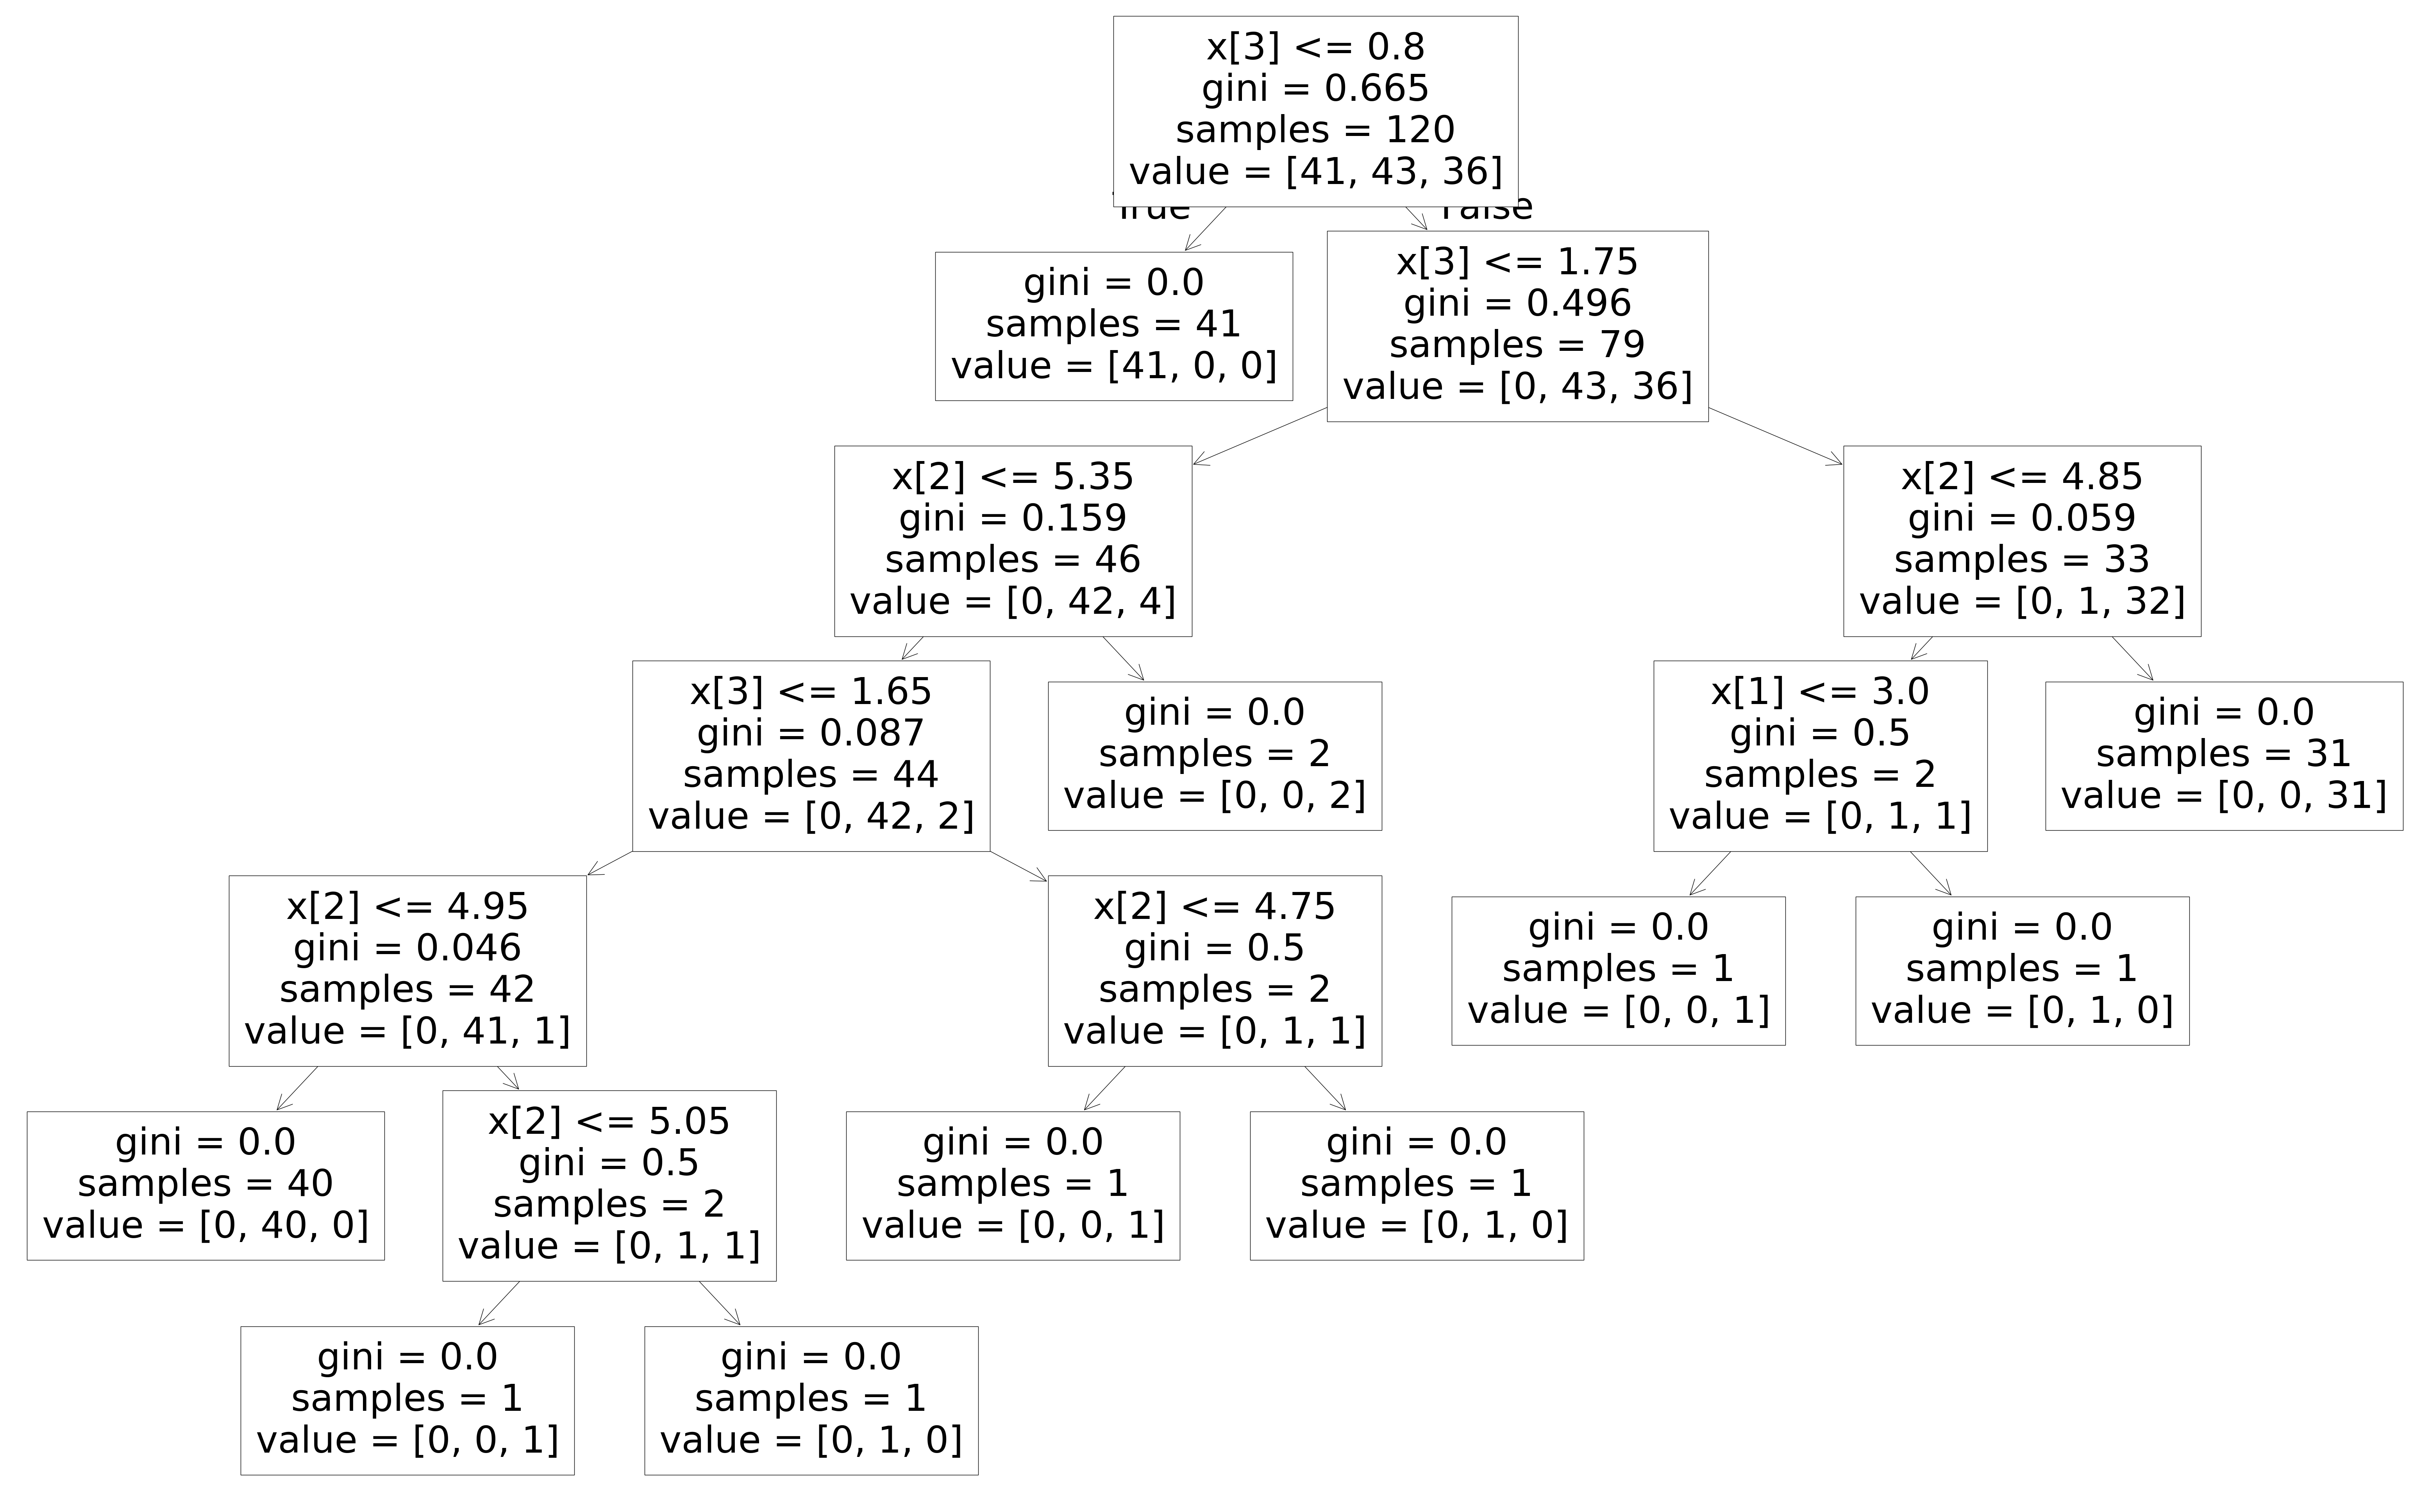

In [16]:
plot_tree(clf)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data=pd.read_csv('/content/train.csv')

In [5]:
data.head(3)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
X=data.iloc[:,1:].values
X.shape

(42000, 784)

In [8]:
y=data.iloc[:,0].values
y.shape

(42000,)

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=9)

In [11]:
X_train.shape

(33600, 784)

In [12]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()

In [13]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [14]:
y_test[100]

np.int64(5)

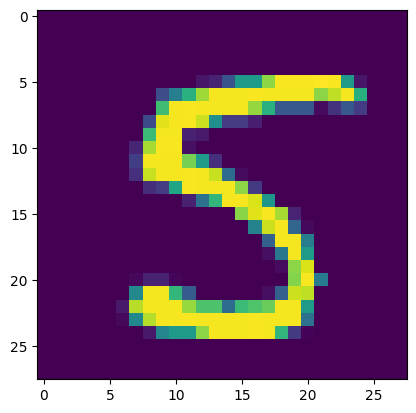

In [15]:
plt.imshow(X_test[100].reshape(28,28))

In [16]:
classifier.predict(X_test[100].reshape(1,784))

array([5])

In [19]:
y_pred=classifier.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8492857142857143

In [32]:
param_dist={
    "criterion":["gini", "entropy", "log_loss"],
    "max_depth":[1,2,3,4,5,6,7]
}


In [33]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(classifier,param_grid=param_dist,cv=10,n_jobs=-1)

In [34]:
grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7]})

In [35]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [36]:
grid.best_score_

np.float64(0.7947916666666667)

In [37]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 7}

In [1]:
#https://github.com/parrt/dtreeviz/blob/master/notebooks/dtreeviz_sklearn_visualisations.ipynb
!pip install dtreeviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 2.6 MB/s eta 0:00:00


In [24]:
import graphviz.backend as be

In [37]:
from sklearn.datasets import *
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG
import dtreeviz
%config InlineBackend.figure_format = 'retina' # Make visualizations look good
%matplotlib inline

In [38]:
clf = tree.DecisionTreeClassifier(max_depth=2)
iris = load_iris()

X_train = iris.data
y_train = iris.target
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'x[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]')]

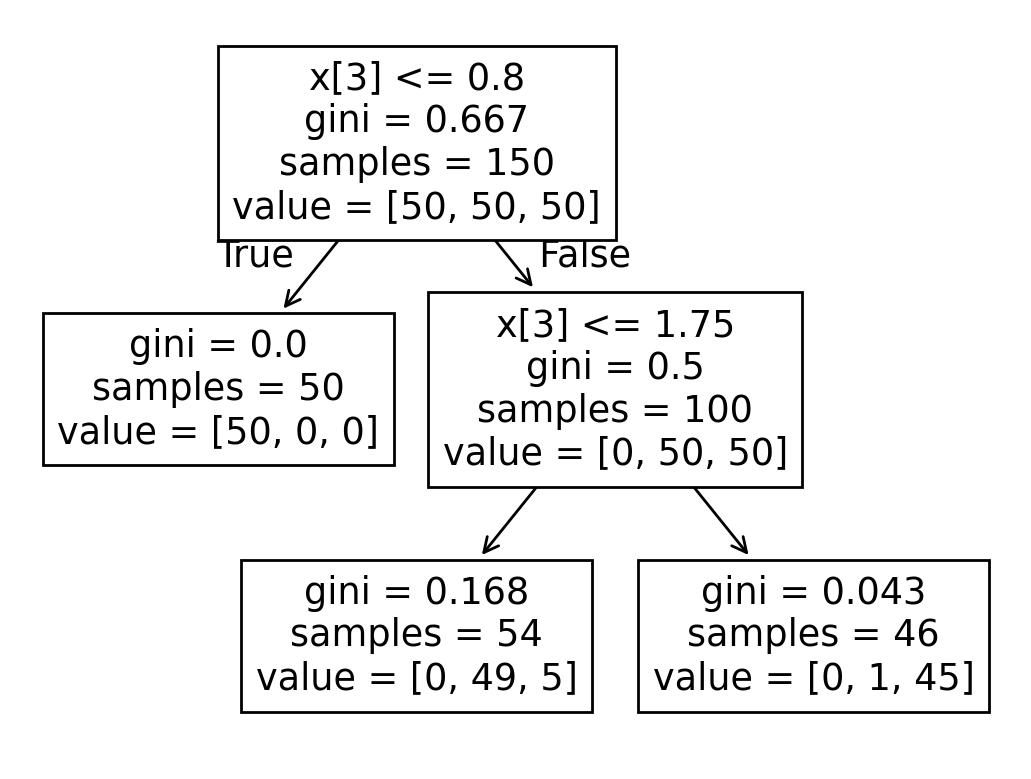

In [39]:
from sklearn.tree import plot_tree
plot_tree(clf)

In [40]:
from dtreeviz.trees import *

viz_model = dtreeviz.model(clf,
                           X_train=X_train, y_train=y_train,
                           feature_names=iris.feature_names,
                           class_names=["setosa", "versicolor", "virginica"])

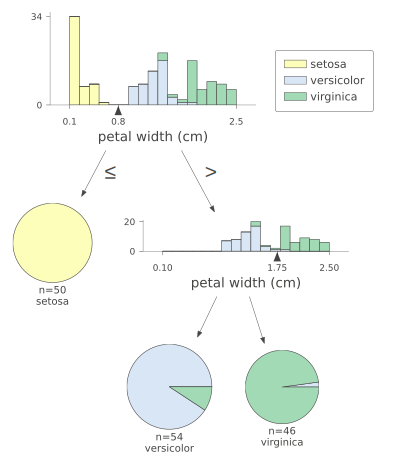

In [41]:
viz_model.view(scale=1.5)

In [63]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
regr = tree.DecisionTreeRegressor(max_depth=1)


X_train = data
y_train = target
regr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [64]:
features_reg=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

In [65]:
viz_rmodel = dtreeviz.model(model=regr,
                            X_train=data,
                            y_train=target,
                            feature_names=features_reg,
                            target_name='price')

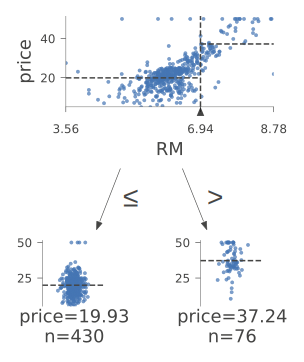

In [66]:
viz_rmodel.view(scale=2)

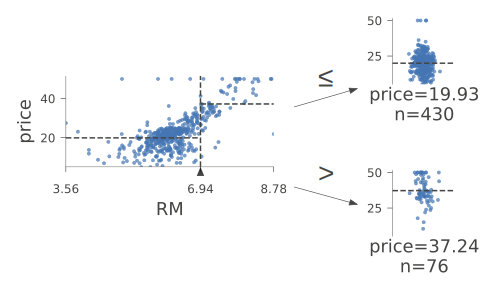

In [75]:
import logging
logging.getLogger('matplotlib.font_manager').disabled = True
viz_rmodel.view(orientation="LR",scale=2)

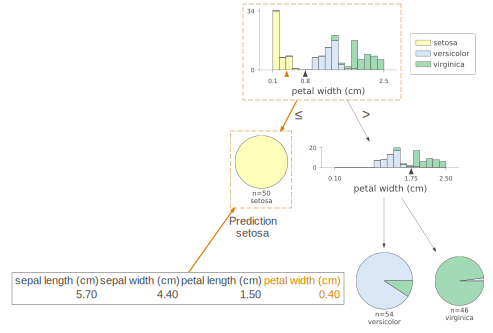

In [84]:
clas = tree.DecisionTreeClassifier()
iris = load_iris()

X_train = iris.data
y_train = iris.target
clas.fit(X_train, y_train)

X = iris.data[np.random.randint(0, len(iris.data)),:]

viz_model = dtreeviz.model(clf,
                           X_train=X_train, y_train=y_train,
                           feature_names=iris.feature_names,
                           class_names=["setosa", "versicolor", "virginica"])
viz_model.view(x=X)